In [16]:
import numpy as np               
import pandas as pd              
import seaborn as sns             
from scipy import stats         
import calendar
from datetime import datetime   
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec
%matplotlib inline

import math

In [3]:
import os
print(os.listdir("../25. Bike Sharing Demand"))

['Data Visualization.ipynb', 'test.zip', 'Bike Sharing Demand.ipynb', '.ipynb_checkpoints', 'final submission.csv', 'train.zip']


In [4]:
train = pd.read_csv('train.zip')
test = pd.read_csv('test.zip')

In [5]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [6]:
train.info()
train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


(10886, 12)

In [7]:
test.info()
test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


(6493, 9)

### Cleaning the data

In [8]:
check_vari = ['season', 'holiday', 'workingday', 'weather']

for i in check_vari: 
    print(i + ":" )
    print(set(train[i]))
    print('\n')

season:
{1, 2, 3, 4}


holiday:
{0, 1}


workingday:
{0, 1}


weather:
{1, 2, 3, 4}




In [9]:
train['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [10]:
train['season'].value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [11]:
# Checking for the uniq values. 
len(set(train['datetime'])) # they all uniq values

10886

In [12]:
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

###### Create new columns "date", "year", "month", "day", "hour", and "weekday" from "datetime" column.

In [13]:
train_date = pd.DatetimeIndex(train['datetime'])
train['year'] = train_date.year
train['month'] = train_date.month
train['hour'] = train_date.hour
train['dayofweek'] = train_date.dayofweek

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
hour          10886 non-null int64
dayofweek     10886 non-null int64
dtypes: float64(3), int64(12), object(1)
memory usage: 1.3+ MB


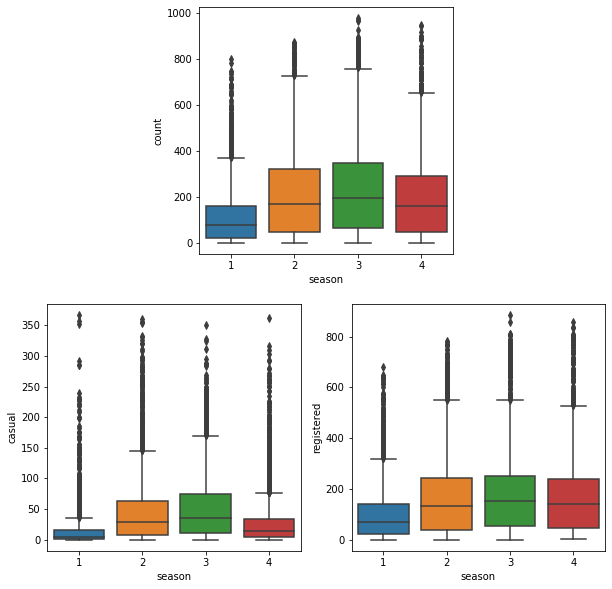

In [17]:
# season
# non-registered user: less rentals in spring & winter
# registered user: less rentals in spring
fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.boxplot(x='season', y='count', data=train)
plt.subplot(gs1[2:, :2])
sns.boxplot(x='season', y='casual', data=train)
plt.subplot(gs1[2:, 2:])
sns.boxplot(x='season', y='registered', data=train)
plt.show()

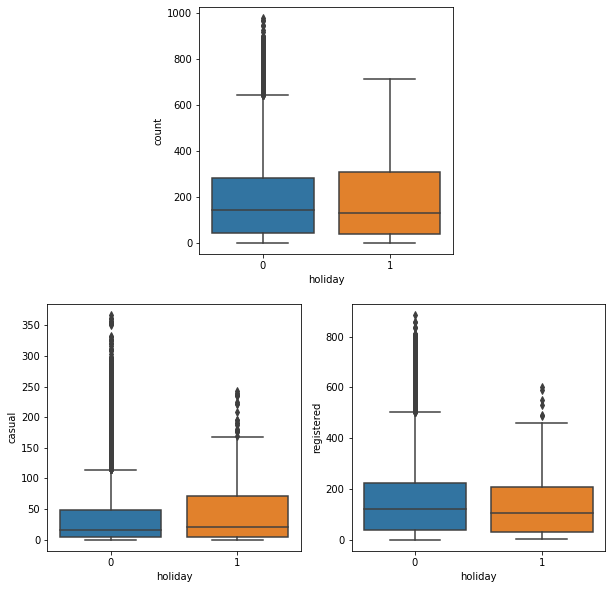

In [18]:
# holiday
# non-registered users: more rentals in holidays
fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.boxplot(x='holiday', y='count', data=train)
plt.subplot(gs1[2:, :2])
sns.boxplot(x='holiday', y='casual', data=train)
plt.subplot(gs1[2:, 2:])
sns.boxplot(x='holiday', y='registered', data=train)
plt.show()

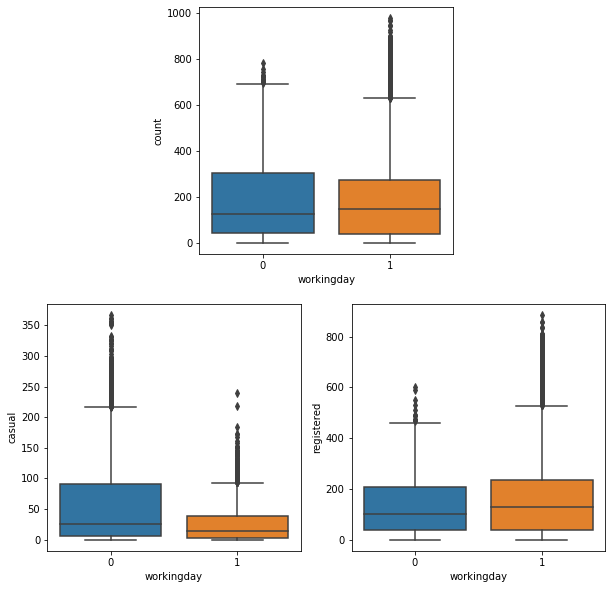

In [19]:
# workingday
# non-registered user: less rentals in workingday
# registered user: more rentals in workingday
fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.boxplot(x='workingday', y='count', data=train)
plt.subplot(gs1[2:, :2])
sns.boxplot(x='workingday', y='casual', data=train)
plt.subplot(gs1[2:, 2:])
sns.boxplot(x='workingday', y='registered', data=train)
plt.show()

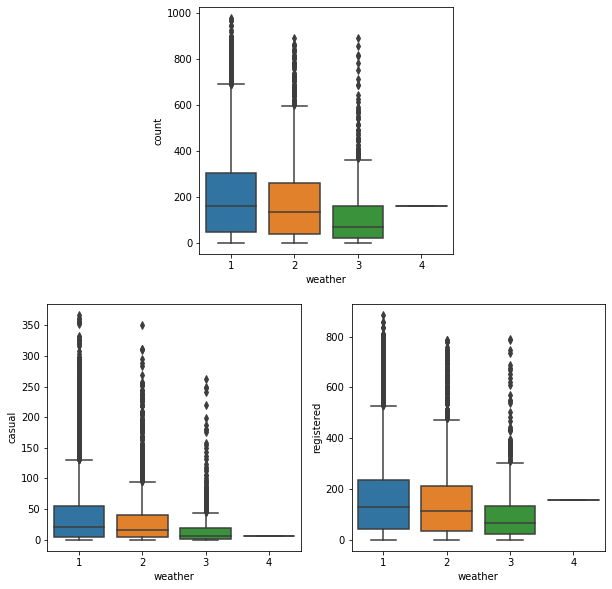

In [20]:
# weather
# more rentals in sunny & cloudy days
fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.boxplot(x='weather', y='count', data=train)
plt.subplot(gs1[2:, :2])
sns.boxplot(x='weather', y='casual', data=train)
plt.subplot(gs1[2:, 2:])
sns.boxplot(x='weather', y='registered', data=train)
plt.show()

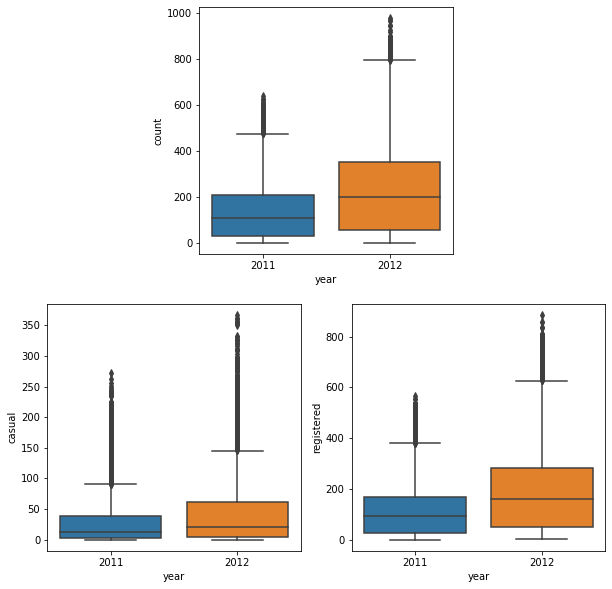

In [21]:
# year
# more rentals as time passes
fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.boxplot(x='year', y='count', data=train)
plt.subplot(gs1[2:, :2])
sns.boxplot(x='year', y='casual', data=train)
plt.subplot(gs1[2:, 2:])
sns.boxplot(x='year', y='registered', data=train)
plt.show()

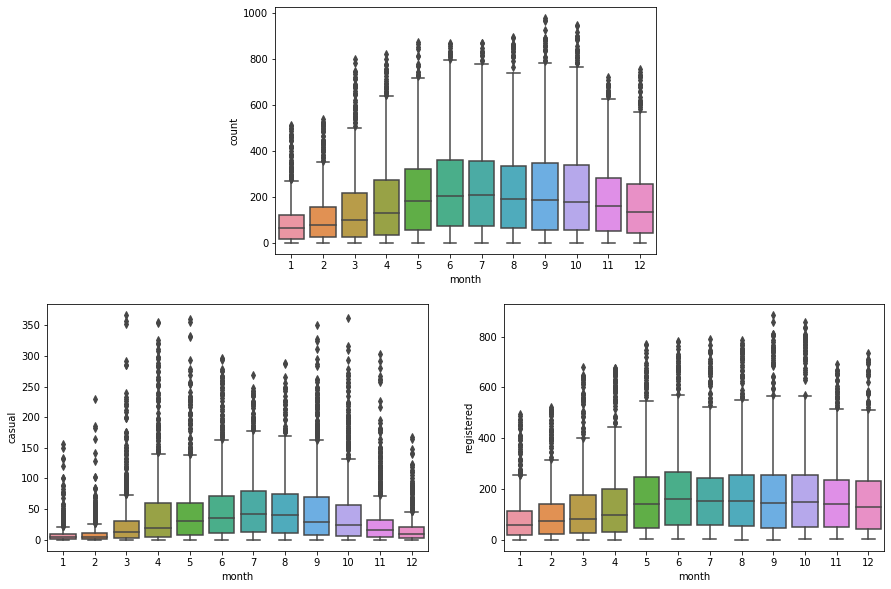

In [22]:
# month
# non-registered user: less rentals in spring & winter
# registered user: less rentals in spring
fig = plt.figure(figsize=(15, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.boxplot(x='month', y='count', data=train)
plt.subplot(gs1[2:, :2])
sns.boxplot(x='month', y='casual', data=train)
plt.subplot(gs1[2:, 2:])
sns.boxplot(x='month', y='registered', data=train)
plt.show()

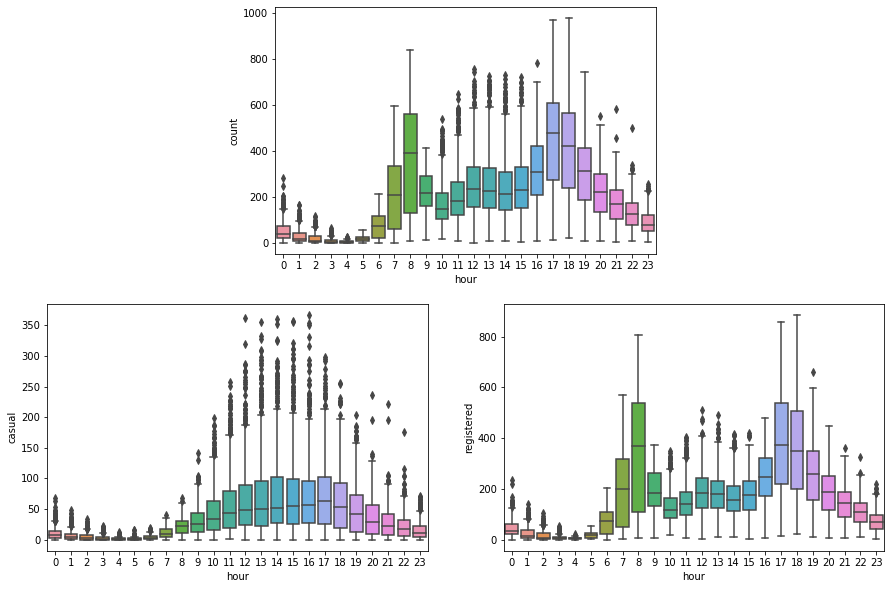

In [23]:
# hour
# non-registered user: more rentals during daytime
# registered user: more rentals when going to work / going off work
fig = plt.figure(figsize=(15, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.boxplot(x='hour', y='count', data=train)
plt.subplot(gs1[2:, :2])
sns.boxplot(x='hour', y='casual', data=train)
plt.subplot(gs1[2:, 2:])
sns.boxplot(x='hour', y='registered', data=train)
plt.show()

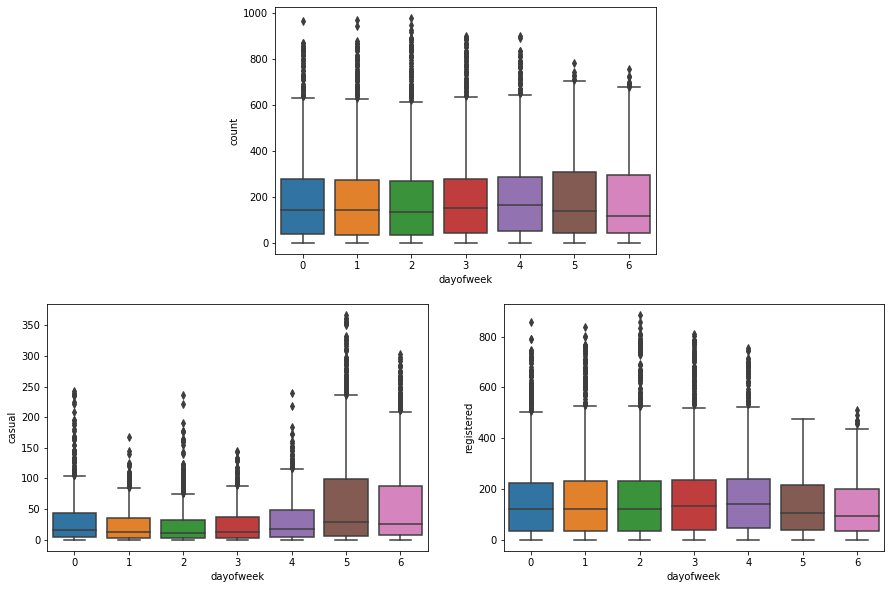

In [24]:
# dayofweek
# non-registered user: less rentals in workingday
# registered user: more rentals in workingday
fig = plt.figure(figsize=(15, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.boxplot(x='dayofweek', y='count', data=train)
plt.subplot(gs1[2:, :2])
sns.boxplot(x='dayofweek', y='casual', data=train)
plt.subplot(gs1[2:, 2:])
sns.boxplot(x='dayofweek', y='registered', data=train)
plt.show()

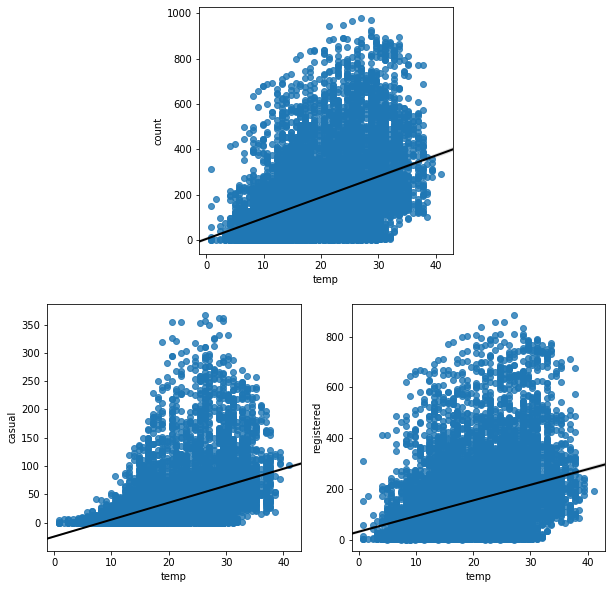

In [25]:
# temp
# higher temp -> more rentals
fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.regplot(x='temp', y='count', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, :2])
sns.regplot(x='temp', y='casual', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, 2:])
sns.regplot(x='temp', y='registered', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.show()

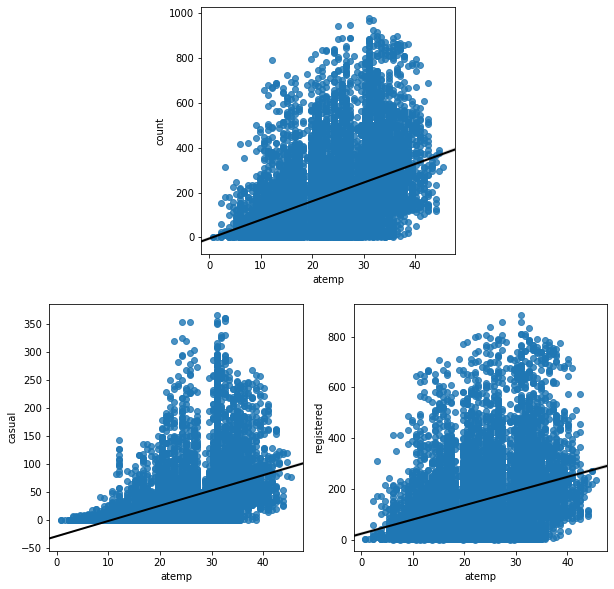

In [26]:
# atemp
# higher atemp -> more rentals
fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.regplot(x='atemp', y='count', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, :2])
sns.regplot(x='atemp', y='casual', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, 2:])
sns.regplot(x='atemp', y='registered', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.show()

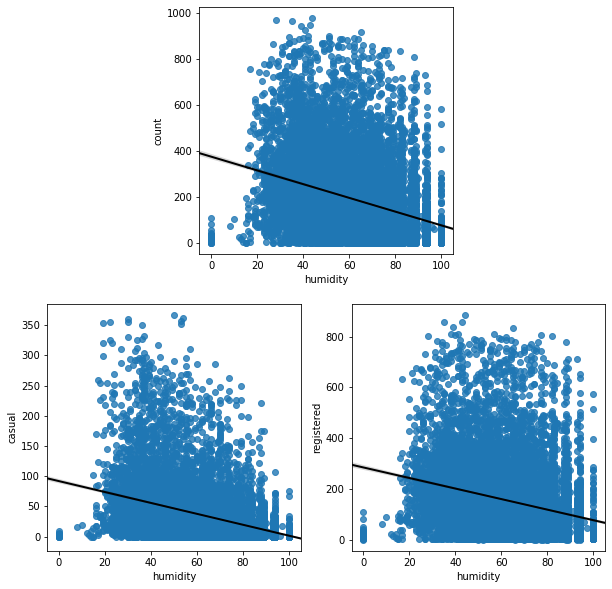

In [27]:
# humidity
# higher humidity -> less rentals
fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.regplot(x='humidity', y='count', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, :2])
sns.regplot(x='humidity', y='casual', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, 2:])
sns.regplot(x='humidity', y='registered', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.show()

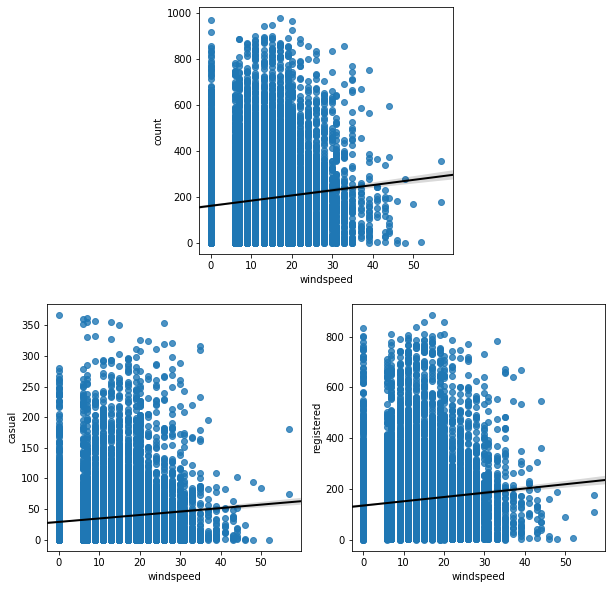

In [28]:
# windspeed
# no obvious relationship
fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.regplot(x='windspeed', y='count', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, :2])
sns.regplot(x='windspeed', y='casual', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, 2:])
sns.regplot(x='windspeed', y='registered', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.show()